
##🏡 Multiple Linear Regression Dataset (Real-Life Example)
#### A dataset with the following columns:


#### SquareFootage: Size of the house (600–3500 sqft)


#### Bedrooms: Number of bedrooms (1–5)


#### LocationQuality: Categorical variable (Low, Medium, High)


#### Price: House price, calculated based on square footage, bedroom count, and location

## 🔢 How the Model Works (Concept):

#### In multiple linear regression, the price is predicted as:

#### Price=β0+β1∗(SquareFootage)+β2∗(Bedrooms)+β3∗(LocationQuality)+ε
### Where:

#### β1 shows how much an increase in square footage adds to the price

#### β2 shows the impact of more bedrooms

#### β3 adjusts the base price depending on location quality

In [3]:
import pandas as pd
import statsmodels.api as sm

# Load your CSV
# df = pd.read_csv("multiple_linear_regression_housing.csv")
# df.head()


# Set seed for reproducibility
np.random.seed(101)

# Generate data
n = 500
square_footage = np.random.normal(1800, 400, n).astype(int)
bedrooms = np.random.randint(2, 6, n)
bathrooms = np.random.randint(1, 4, n)
age = np.random.randint(0, 50, n)
garage = np.random.randint(0, 2, n)
location_score = np.random.uniform(1, 10, n).round(2)

# Simulate house price with noise
price = (
    square_footage * 135 +
    bedrooms * 10000 +
    bathrooms * 8500 -
    age * 700 +
    garage * 9000 +
    location_score * 10000 +
    np.random.normal(0, 30000, n)
).round(2)

# Create DataFrame
df = pd.DataFrame({
    "SquareFootage": square_footage,
    "Bedrooms": bedrooms,
    "Bathrooms": bathrooms,
    "Age": age,
    "Garage": garage,
    "LocationScore": location_score,
    "Price": price
})

# Save to CSV
df.to_csv("robust_multiple_linear_regression_dataset.csv", index=False)
df.head()

,SquareFootage,Bedrooms,Bathrooms,Age,Garage,LocationScore,Price
0,2882,2,3,17,1,7.20,504119.45
1,2051,5,3,27,0,7.86,377555.87
2,2163,4,2,13,1,7.84,442942.13
3,2001,4,2,34,1,5.97,429162.33
4,2060,5,2,20,1,1.34,336050.13


In [4]:
df.shape

(500, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SquareFootage  500 non-null    int32  
 1   Bedrooms       500 non-null    int32  
 2   Bathrooms      500 non-null    int32  
 3   Age            500 non-null    int32  
 4   Garage         500 non-null    int32  
 5   LocationScore  500 non-null    float64
 6   Price          500 non-null    float64
dtypes: float64(2), int32(5)
memory usage: 17.7 KB


In [6]:
df.describe()

,SquareFootage,Bedrooms,Bathrooms,Age,Garage,LocationScore,Price
count,500.00000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000
mean,1809.12400,3.562000,1.982000,24.630000,0.500000,5.45998,339423.735440
std,422.30469,1.099351,0.809312,14.444875,0.500501,2.62035,72743.526753
min,686.00000,2.000000,1.000000,0.000000,0.000000,1.05000,139447.130000
25%,1495.25000,3.000000,1.000000,13.000000,0.000000,3.14250,290340.425000
50%,1822.50000,4.000000,2.000000,24.000000,0.500000,5.55000,340197.270000
75%,2096.00000,5.000000,3.000000,37.000000,1.000000,7.75250,388864.445000
max,2955.00000,5.000000,3.000000,49.000000,1.000000,9.99000,572560.160000


In [7]:

# Prepare predictors (X) and target (y)
X = df[["SquareFootage", "Bedrooms", "Bathrooms", "Age", "Garage", "LocationScore"]]
y = df["Price"]

# Add intercept (β0)
X = sm.add_constant(X)

# Fit model
model = sm.OLS(y, X).fit()

# Print model summary
print(model.summary())

# Coefficients (rounded)
print("\nCoefficients:")
print(model.params.round(2))

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     419.7
Date:                Fri, 27 Jun 2025   Prob (F-statistic):          4.14e-190
Time:                        18:13:21   Log-Likelihood:                -5853.9
No. Observations:                 500   AIC:                         1.172e+04
Df Residuals:                     493   BIC:                         1.175e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          3478.9776   8715.086      0.399

In [8]:


# Make a prediction
example = pd.DataFrame({
    "const": [1],
    "SquareFootage": [2000],
    "Bedrooms": [3],
    "Bathrooms": [2],
    "Age": [10],
    "Garage": [1],
    "LocationScore": [8.5]
})
predicted_price = model.predict(example)[0]
print(f"\nPredicted price for the example house: ${predicted_price:,.2f}")



Predicted price for the example house: $406,824.40


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     419.7
Date:                Fri, 27 Jun 2025   Prob (F-statistic):          4.14e-190
Time:                        18:27:30   Log-Likelihood:                -5853.9
No. Observations:                 500   AIC:                         1.172e+04
Df Residuals:                     493   BIC:                         1.175e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          3478.9776   8715.086      0.399

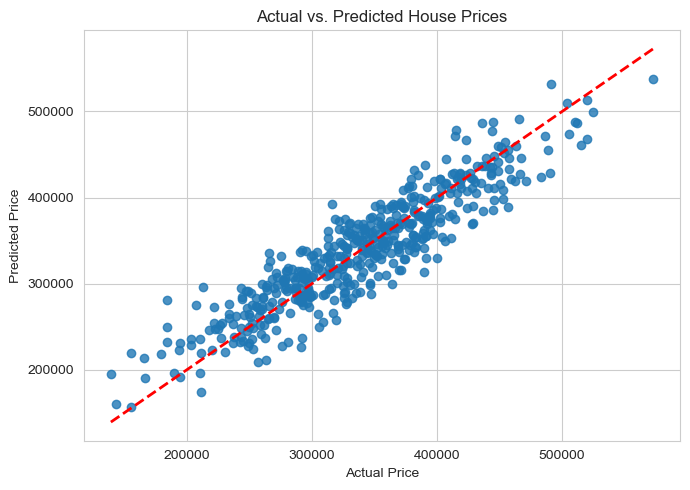

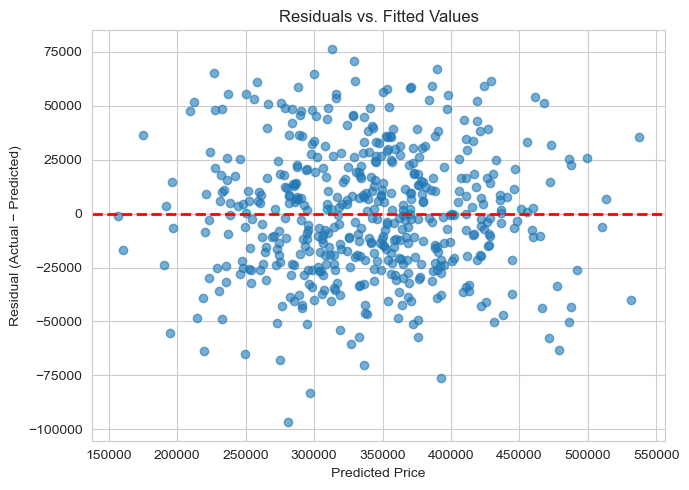

R-squared: 0.836


In [14]:
"""
multiple_regression_plot.py
---------------------------
Visual diagnostics for a Multiple Linear Regression model
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns  # optional but helps with styling

# ------------------------------------------------------------------
# 1) LOAD THE DATA   (change the path if your CSV lives elsewhere)
# ------------------------------------------------------------------
csv_path = "robust_multiple_linear_regression_dataset.csv"
df = pd.read_csv(csv_path)

# ------------------------------------------------------------------
# 2) PREPARE PREDICTORS (X) AND TARGET (y)
# ------------------------------------------------------------------
X = df[["SquareFootage",
        "Bedrooms",
        "Bathrooms",
        "Age",
        "Garage",
        "LocationScore"]]

y = df["Price"]

# Add intercept term β0
X = sm.add_constant(X)

# ------------------------------------------------------------------
# 3) FIT THE MODEL
# ------------------------------------------------------------------
model = sm.OLS(y, X).fit()

print(model.summary())      # optional: shows regression table in the console

# ------------------------------------------------------------------
# 4) PREDICTIONS
# ------------------------------------------------------------------
y_pred = model.predict(X)
residuals = y - y_pred      # actual − predicted

# ------------------------------------------------------------------
# 5) PLOTTING
# ------------------------------------------------------------------
sns.set_style("whitegrid")   # nicer aesthetics (optional)

# --- (a) Actual vs. Predicted -------------------------------------
plt.figure(figsize=(7, 5))
plt.scatter(y, y_pred, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], lw=2,color='red', linestyle="--")
plt.title("Actual vs. Predicted House Prices")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.tight_layout()
plt.show()

# --- (b) Residuals vs. Fitted -------------------------------------
plt.figure(figsize=(7, 5))
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(0, color="red", lw=2, linestyle="--")
plt.title("Residuals vs. Fitted Values")
plt.xlabel("Predicted Price")
plt.ylabel("Residual (Actual − Predicted)")
plt.tight_layout()
plt.show()

# ------------------------------------------------------------------
# 6) R-squared (printed to console for quick reference)
# ------------------------------------------------------------------
# print(f"Estimated: {model.summary():.3f}")
print(f"R-squared: {model.rsquared:.3f}")


#### The Multiple Regression Equation 
#### 
* const          3478.9776  
* SquareFootage   138.3263      
* Bedrooms       8323.5380   
* Bathrooms      8418.5019   
* Age            -787.8160   
* Garage         5769.3015  
* LocationScore  1.023e+04 
* SquareFootage  = SF  
* Bedrooms       = Bdr
* Bathrooms      = Btr
* Age            = Age
* Garage         = Gar
* LocationScore  = Ls
### Price = 3478.9776 + 138.3263 * SF + 8323.5380* Bdr + 8418.5019 * Btr + (-787.8160 )* Age + 5769.3015 * Gar + 1.023e+04 * Ls